## Numerical solution of ODEs

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 18})
import numpy as np

In [2]:
def forward_euler(f, u, dt):
    return u + dt*f(u)

def backward_euler(f, dfdu, u, dt):
    deltau = np.dot( np.linalg.inv(np.eye(2) - dt*dfdu(u)), dt*f(u) )
    return u + deltau

#### Example: Stiff system

$$u' = \begin{bmatrix} -1 & 999 \\ 0 & -1000\end{bmatrix} u$$

In [13]:
A = np.array([[-1,999],[0,-1000]])
T = 1
N = 1000
deltat  = T / N
t = np.linspace(0,T,N)

def f(u): 
    return np.dot(A, u)
    
def dfdu(u):
    return A

Text(0, 0.5, '$u_2$')

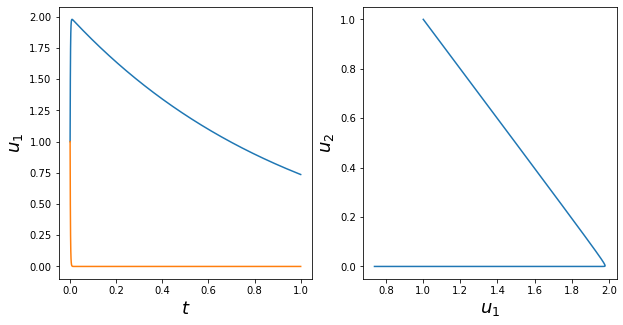

In [14]:
def solve():
    M = 2
    u = np.zeros((N, M))
    u[0,:] = [1, 1]
    for i in range(N-1):
        #u[i+1,:] = forward_euler(f, u[i], deltat)
        u[i+1,:] = backward_euler(f, dfdu, u[i], deltat)
    return u

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for ic in [np.pi/2]: #np.linspace(0,1,21)*np.pi:
    u = solve()
    ax.plot(np.linspace(0,N*deltat,N), u[:,0], '-')
    ax.plot(np.linspace(0,N*deltat,N), u[:,1], '-')
    ax2.plot(u[:,0], u[:,1], '-')
ax.set_xlabel('$t$'); ax.set_ylabel(r'$u_1$')
ax2.set_xlabel('$u_1$'); ax2.set_ylabel(r"$u_2$")